In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt



# matplotlib image size and resolution
mpl_options = {"figsize":(10,10)}
sb.set(rc={'figure.figsize':(12,8)})

from inspect import signature as sig

### Загрузим датасет

In [10]:
from sklearn import datasets

FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target
X.info(), y

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


(None,
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

### Дерево решений ищется при помощи команды DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
sig(DecisionTreeClassifier)

<Signature (*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)>

In [26]:
model = DecisionTreeClassifier(max_depth = 2)

In [27]:
model.fit(X.values,y)
model.predict([[1,2,3,4]])

array([2])

In [28]:
from sklearn.tree import export_graphviz
sig(export_graphviz)

<Signature (decision_tree, out_file=None, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, leaves_parallel=False, impurity=True, node_ids=False, proportion=False, rotate=False, rounded=False, special_characters=False, precision=3, fontname='helvetica')>

In [29]:
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)

In [30]:
#!brew install graphviz

In [31]:
!dot -Tpng tree.dot -o tree.png

In [32]:
#!pip install opencv-python

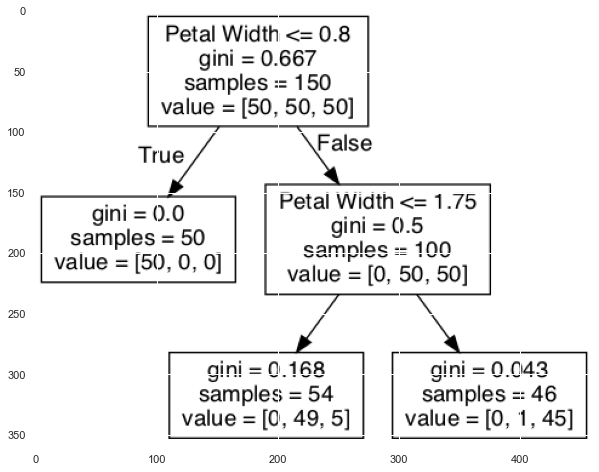

In [33]:
import cv2

img = cv2.imread('tree.png')
plt.imshow(img)

### Посмотрим, насколько это правдоподобно...

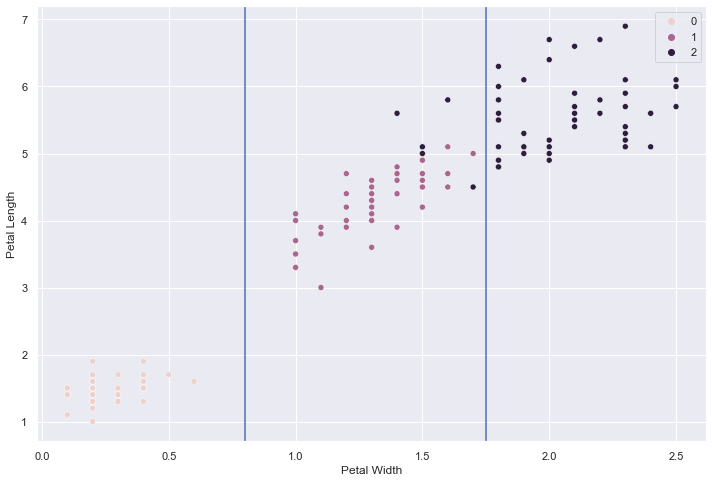

In [34]:
sb.scatterplot(x = 'Petal Width', y = 'Petal Length', data = X, hue = y)
plt.axvline(x=.8)
plt.axvline(x=1.75)

### Попробуем сделать дерево подлиннее...

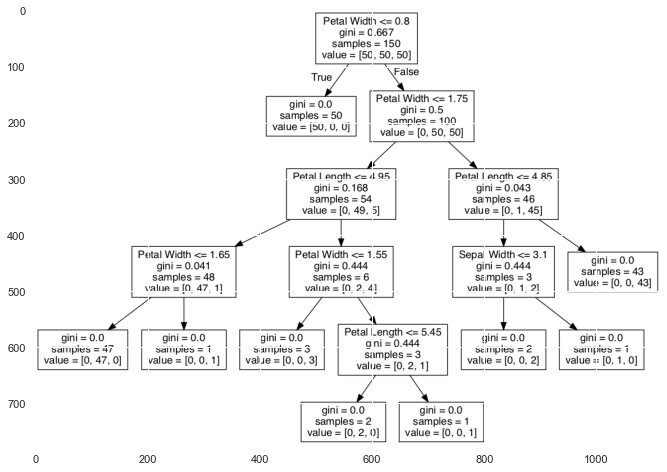

In [35]:
model = DecisionTreeClassifier()
model.fit(X,y)
export_graphviz(model, 'tree.dot', feature_names = FEATURE_NAMES)
!dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.imshow(img)

### Попробуем убрать Sepal Width и Petal Width

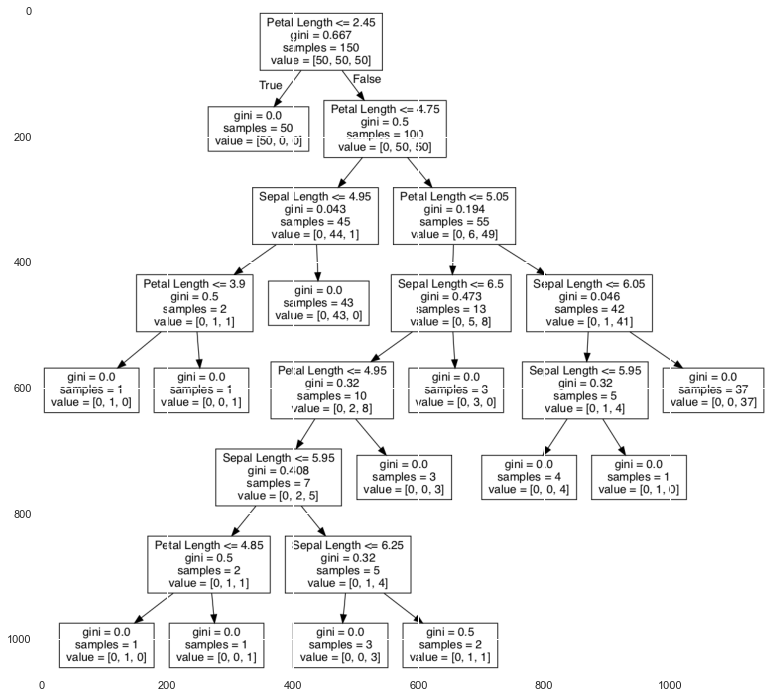

In [36]:
XX = X[['Petal Length','Sepal Length']]

model = DecisionTreeClassifier()
model.fit(XX,y)
export_graphviz(model, 'tree.dot', feature_names = ['Petal Length','Sepal Length'])
!dot -Tpng tree.dot -o tree.png
img = cv2.imread('tree.png')
plt.figure(figsize = (13,13))
plt.imshow(img)

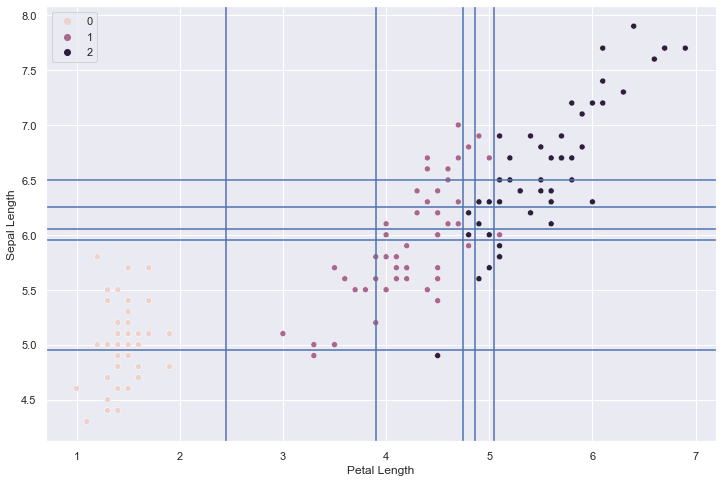

In [37]:
sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

plt.axvline(x=2.45)
plt.axvline(x=4.75)
plt.axvline(x=5.05)
plt.axhline(y=4.95)
plt.axhline(y=6.5)
plt.axhline(y=6.05)
plt.axvline(x=3.9)
plt.axvline(x=4.86)
plt.axhline(y=6.25)
plt.axhline(y=5.95)

In [40]:
model.fit(XX.values,y)

points = np.random.randint(100,800,size=(10000,2))/100

answers = model.predict(points).reshape(10000,1)
stack = np.hstack((points, answers))

s0 = np.array([i[:2] for i in stack  if i[2] == 0])
s1 = np.array([i[:2] for i in stack  if i[2] == 1])
s2 = np.array([i[:2] for i in stack  if i[2] == 2])

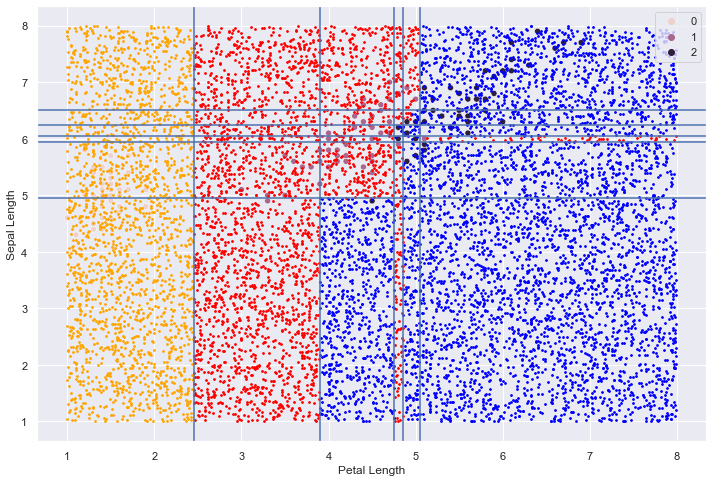

In [41]:
sb.scatterplot(x = 'Petal Length', y = 'Sepal Length', data = XX, hue = y)

plt.axvline(x=2.45)
plt.axvline(x=4.75)
plt.axvline(x=5.05)
plt.axhline(y=4.95)
plt.axhline(y=6.5)
plt.axhline(y=6.05)
plt.axvline(x=3.9)
plt.axvline(x=4.86)
plt.axhline(y=6.25)
plt.axhline(y=5.95)

plt.scatter(s0[:,0], s0[:,1] , color = 'orange', s = 3)
plt.scatter(s1[:,0], s1[:,1] , color = 'red', s = 3)
plt.scatter(s2[:,0], s2[:,1] , color = 'blue', s = 3)

### Какие признаки оверфита вы тут видите? Предложите решение